In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2
a = np.load('pose_result__data_paper_180918_MDN_PR_Fly1_001_SG1_behData_images.pkl')
data = a['points3d'].copy()
print('The dimension is ')
print(data.shape)
t = np.linspace(0,9,899)

The dimension is 
(899, 38, 3)


In [101]:
def ag2(angle):
    return angle/np.pi*180
#angle3 = ag2(np.load('angle_3d.npy').T)
angle1 = ag2(np.load('angle_1d.npy').T)
for i in range(6):
    angle1[i*3+1] = -angle1[i*3+1]
angle1 = 180 - angle1


array([[ 1.        , -0.87714794,  0.38505784,  0.23925323, -0.15469098,
        -0.24939969, -0.12009517,  0.27874281, -0.21505163, -0.11959668,
         0.10071402, -0.26974831,  0.29046995, -0.0408509 , -0.43789403,
        -0.08882323,  0.04599992, -0.20152761],
       [-0.87714794,  1.        , -0.44651956, -0.3283153 ,  0.14958543,
         0.30816207,  0.10664631, -0.35776907,  0.3076907 ,  0.16521554,
        -0.16241641,  0.24075722, -0.32621913,  0.0735751 ,  0.4830218 ,
         0.03290094,  0.03167065,  0.21103789],
       [ 0.38505784, -0.44651956,  1.        ,  0.25506119, -0.27072134,
         0.16713   , -0.06016042,  0.07913606, -0.13586292,  0.01816121,
         0.01223375, -0.01992823,  0.18006558, -0.02534554, -0.09882068,
         0.11818806, -0.06923683, -0.11282353],
       [ 0.23925323, -0.3283153 ,  0.25506119,  1.        , -0.65478614,
         0.05995049,  0.18675253,  0.02165074, -0.23311727,  0.12394605,
        -0.13725652,  0.04166065,  0.32563421, -0.010

In [104]:

for i in zip(np.where(np.corrcoef(angle1)>0.7)[0],np.where(np.corrcoef(angle1)>0.7)[1]):
    if(i[0]!=i[1]):
        print(i)
np.corrcoef(angle1)[np.where(np.corrcoef(angle1)>0.7)]

(0, 1)
(1, 0)
(6, 7)
(7, 6)
(9, 10)
(10, 9)
(15, 16)
(16, 15)


array([1.        , 0.87714794, 0.87714794, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.71919466,
       0.71919466, 1.        , 1.        , 1.        , 0.89729915,
       0.89729915, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.8591995 , 0.8591995 , 1.        ,
       1.        ])

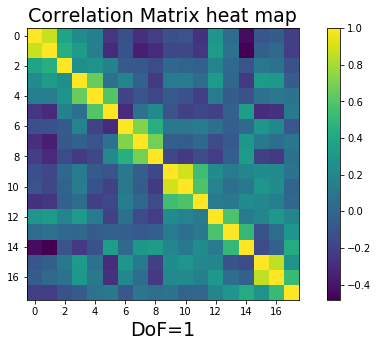

In [112]:
fig = plt.figure(figsize=(10,5))
plt.title('Correlation Matrix heat map', fontsize=19)
plt.imshow(np.corrcoef(angle1))
#cmap='RdBu'
plt.colorbar()
plt.xlabel('DoF=1',fontsize=19)
fig.savefig('../../Pictures/heatmap_dof1.jpg')

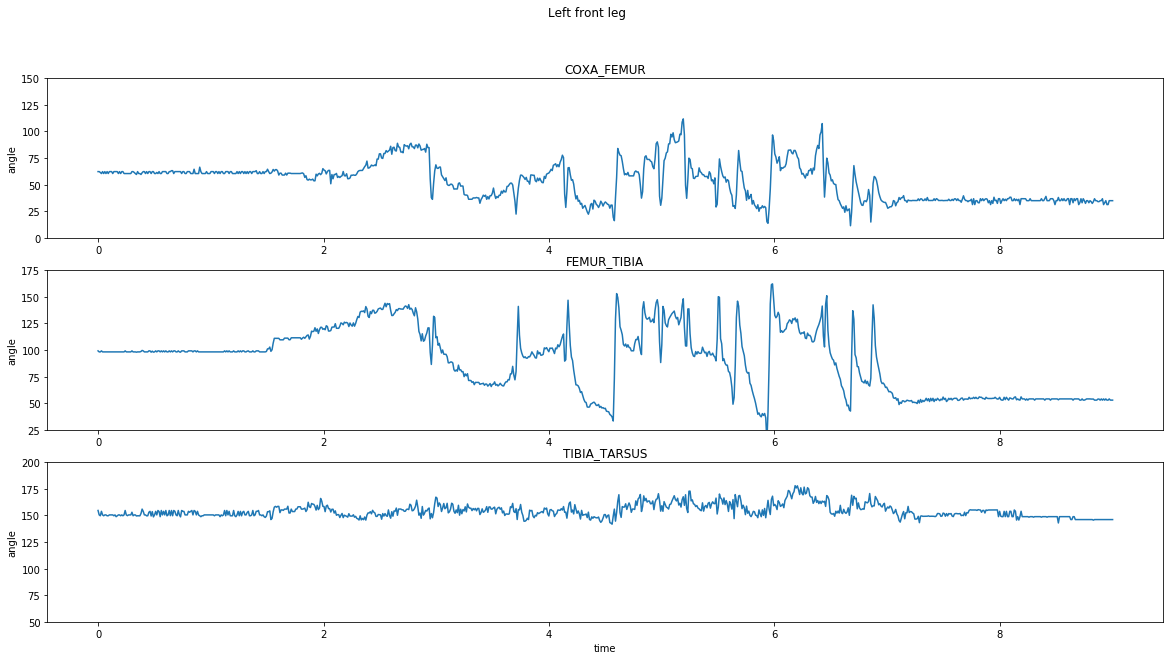

In [98]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Left front leg')
ax1.plot(t, angle1[0])
ax1.set_title('COXA_FEMUR')
ax1.set_ylabel('angle')
ax1.set_ylim(0,150)
#ax1.set_xlabel('time')

ax2.plot(t, angle1[1])
ax2.set_title('FEMUR_TIBIA')
ax2.set_ylabel('angle')
ax2.set_ylim(25,175)
#ax2.set_xlabel('time')

ax3.plot(t, angle1[2])
ax3.set_title('TIBIA_TARSUS')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(50,200)
fig.savefig('../../Pictures/lf_1dof.jpg')

In [80]:
np.set_printoptions(suppress=True) 
print('left front leg: Correlation Matrix')
np.corrcoef(angle1[0:3])

left front leg: Correlation Matrix


array([[1.        , 0.87714794, 0.38505784],
       [0.87714794, 1.        , 0.44651956],
       [0.38505784, 0.44651956, 1.        ]])

(50, 200)

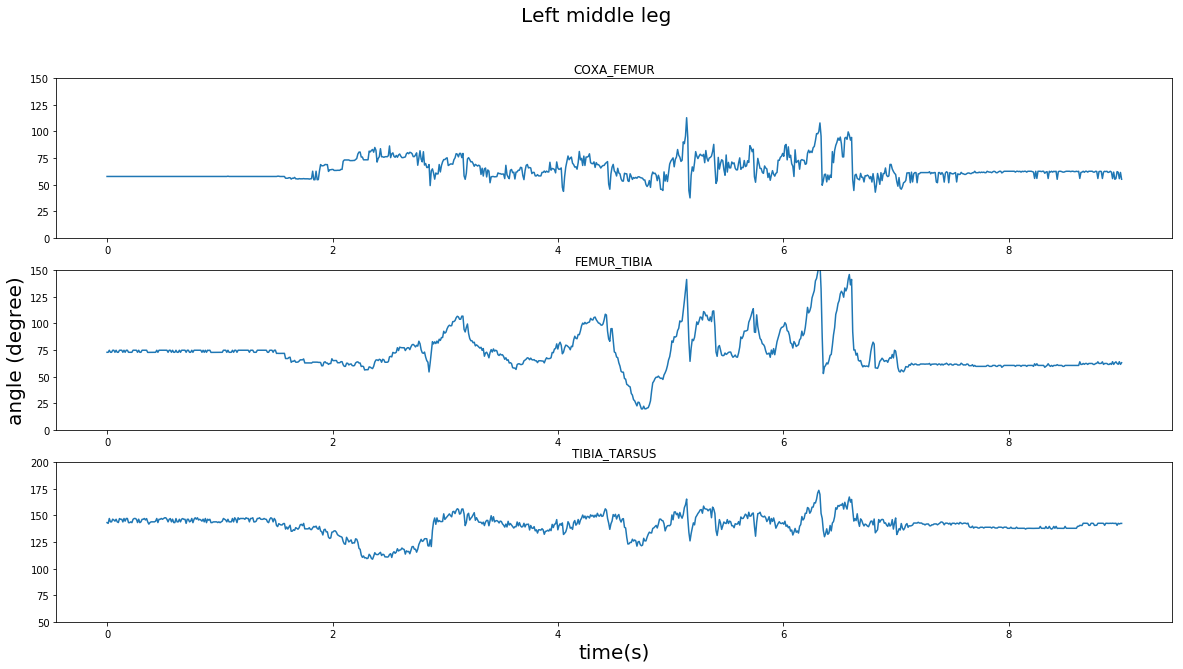

In [99]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Left middle leg', fontsize=20)
ax1.plot(t, angle1[3])
ax1.set_title('COXA_FEMUR')
ax1.set_ylim(0,150)
#ax1.set_ylabel('angle(degree)')
#ax1.set_xlabel('time(s)')

ax2.plot(t, angle1[4])
ax2.set_title('FEMUR_TIBIA')
ax2.set_ylabel('angle (degree)', fontsize=20)
#ax2.set_xlabel('time(s)')
ax2.set_ylim(0,150)

ax3.plot(t, angle1[5])
ax3.set_title('TIBIA_TARSUS')
#ax3.set_ylabel('angle(degree)')
ax3.set_xlabel('time(s)', fontsize=20)
ax3.set_ylim(50,200)

In [100]:
fig.savefig('../../Pictures/lm_dof=1.jpg')

In [83]:
print('left middle leg: Correlation Matrix')
np.corrcoef(angle1[3:6])

left middle leg: Correlation Matrix


array([[1.        , 0.65478614, 0.05995049],
       [0.65478614, 1.        , 0.60580903],
       [0.05995049, 0.60580903, 1.        ]])

(50, 200)

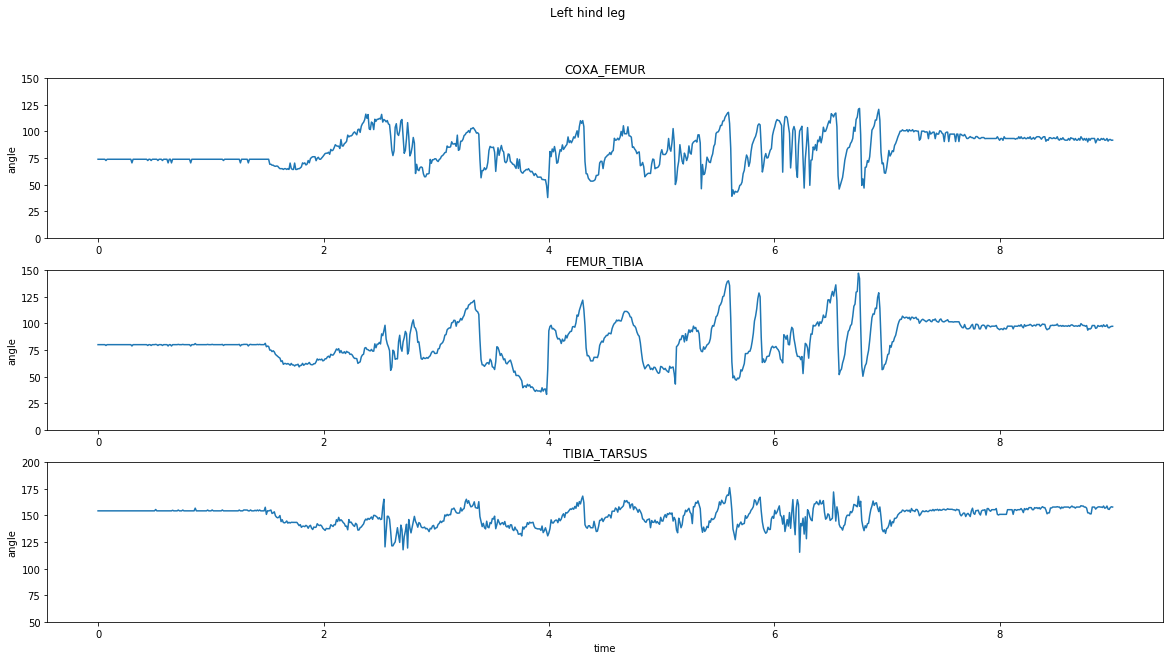

In [75]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Left hind leg')
ax1.plot(t, angle1[6])
ax1.set_title('COXA_FEMUR')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(0,150)

ax2.plot(t, angle1[7])
ax2.set_title('FEMUR_TIBIA')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(0,150)

ax3.plot(t, angle1[8])
ax3.set_title('TIBIA_TARSUS')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(50,200)

In [84]:
print('left hind leg: Correlation Matrix')
np.corrcoef(angle1[6:9])

left hind leg: Correlation Matrix


array([[1.        , 0.71919466, 0.44744407],
       [0.71919466, 1.        , 0.68812081],
       [0.44744407, 0.68812081, 1.        ]])

(50, 200)

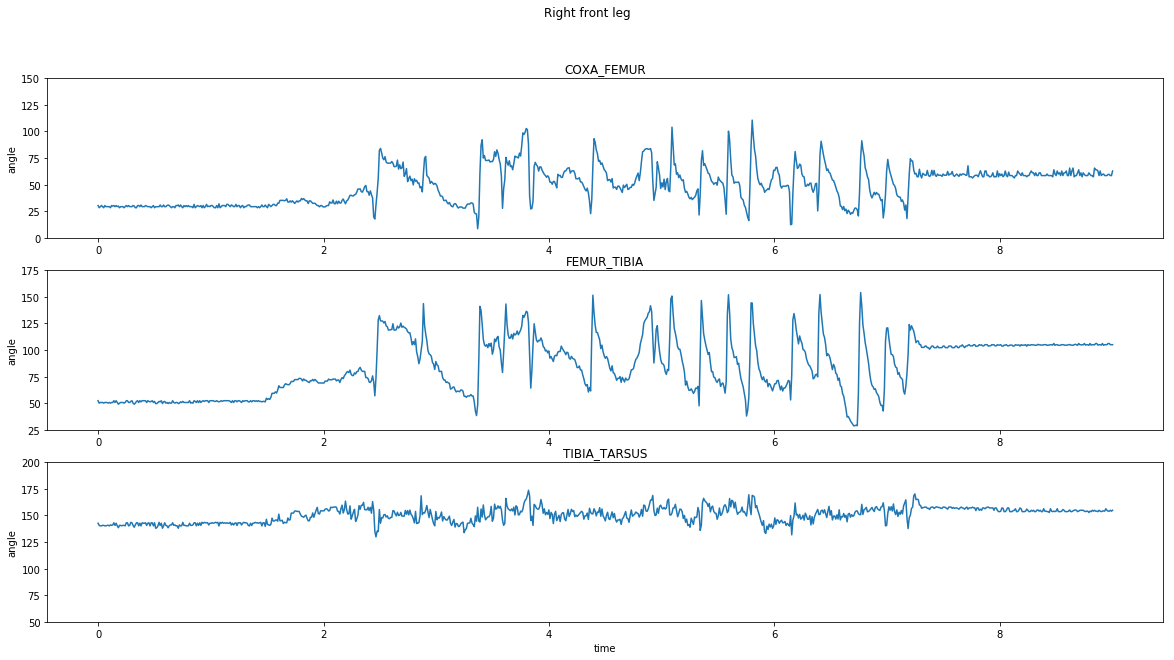

In [76]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Right front leg')
ax1.plot(t, angle1[9])
ax1.set_title('COXA_FEMUR')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(0,150)

ax2.plot(t,angle1[10])
ax2.set_title('FEMUR_TIBIA')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(25,175)

ax3.plot(t, angle1[11])
ax3.set_title('TIBIA_TARSUS')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(50,200)

In [85]:
print('right front leg: Correlation Matrix')
np.corrcoef(angle1[9:12])

right front leg: Correlation Matrix


array([[1.        , 0.89729915, 0.54563381],
       [0.89729915, 1.        , 0.58355678],
       [0.54563381, 0.58355678, 1.        ]])

(50, 200)

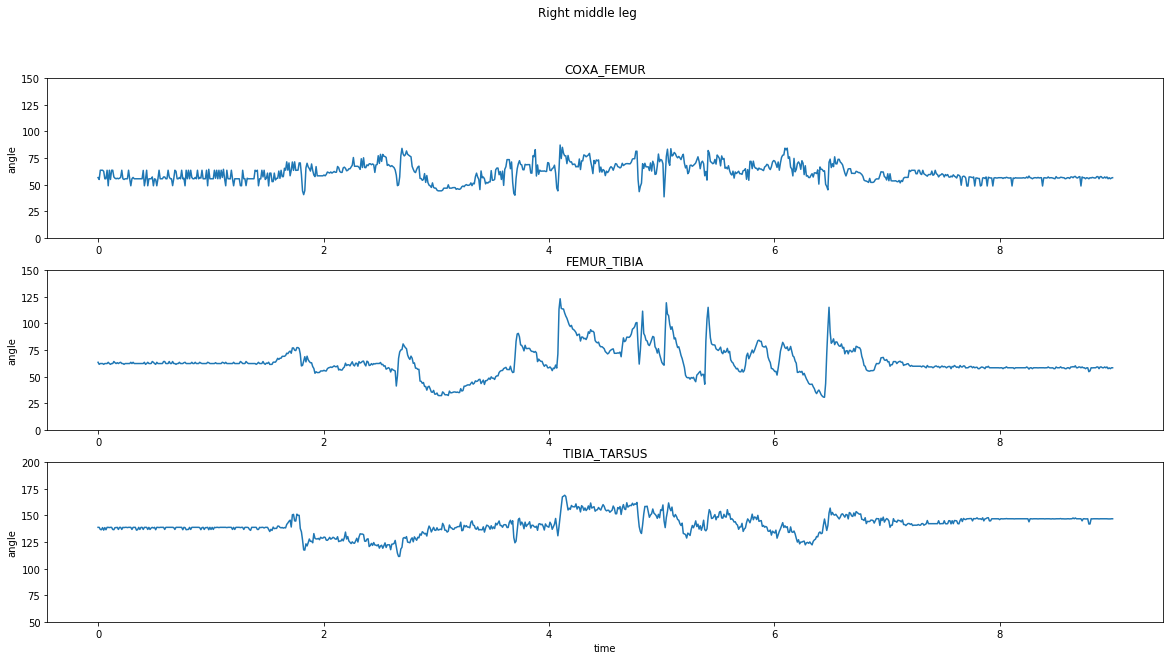

In [77]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Right middle leg')
ax1.plot(t, angle1[12])
ax1.set_title('COXA_FEMUR')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(0,150)

ax2.plot(t, angle1[13])
ax2.set_title('FEMUR_TIBIA')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(0,150)

ax3.plot(t, angle1[14])
ax3.set_title('TIBIA_TARSUS')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(50,200)

In [86]:
print('right middle leg: Correlation Matrix')
np.corrcoef(angle1[12:15])

right middle leg: Correlation Matrix


array([[1.        , 0.58126575, 0.13063246],
       [0.58126575, 1.        , 0.5032691 ],
       [0.13063246, 0.5032691 , 1.        ]])

(50, 200)

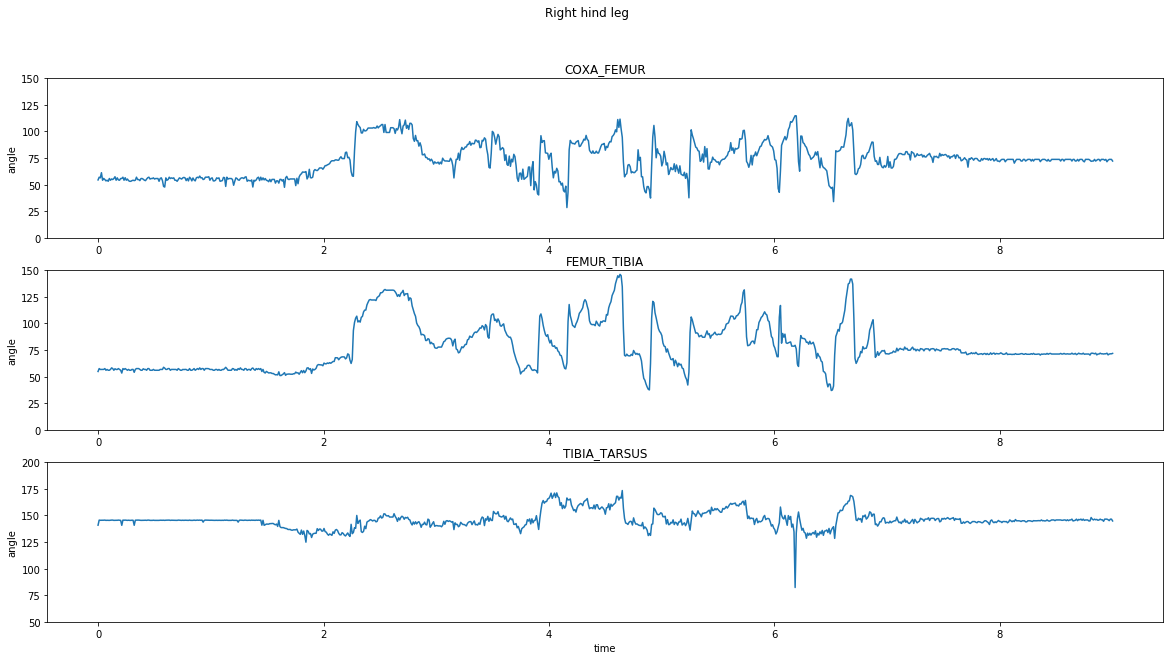

In [79]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,10))
fig.suptitle('Right hind leg')
ax1.plot(t, angle1[15])
ax1.set_title('COXA_FEMUR')
ax1.set_ylabel('angle')
#ax1.set_xlabel('time')
ax1.set_ylim(0,150)

ax2.plot(t, angle1[16])
ax2.set_title('FEMUR_TIBIA')
ax2.set_ylabel('angle')
#ax2.set_xlabel('time')
ax2.set_ylim(0,150)

ax3.plot(t, angle1[17])
ax3.set_title('TIBIA_TARSUS')
ax3.set_ylabel('angle')
ax3.set_xlabel('time')
ax3.set_ylim(50,200)

In [87]:
print('right hinde leg: Correlation Matrix')
np.corrcoef(angle1[15:18])

right hinde leg: Correlation Matrix


array([[1.        , 0.8591995 , 0.27131192],
       [0.8591995 , 1.        , 0.51839992],
       [0.27131192, 0.51839992, 1.        ]])